# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [719]:
m = 1
A = 0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [720]:
using Quadmath, Printf

res=m;
N=2.0^m*1500.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
Nt=2.0^m*1500.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [721]:
print(N)

1500.0

In [722]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [723]:
using Printf
include("./ScalarField.jl");
include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [724]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)


step size is  0.0006666666666666666
the time step is 0.00033333335


# Initial data of m β Ψ and Ψ,x

In [725]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [726]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [727]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [728]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);
state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

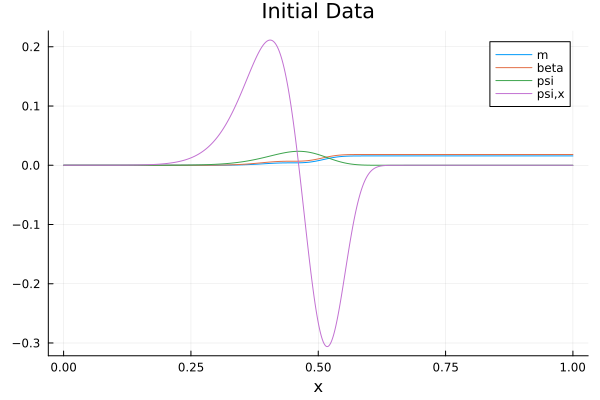

In [729]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

In [730]:
"""using TickTock
tick()
a=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5])#doublegrid(initX1)
tock()

tick()
f=Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
b=f(initX1)

#println(a.-b)
tock()

#plot(initX1, a.-init_gaussian_der(initX1,r0,sigma,A))
plot(doublegrid(initX1), a.-init_gaussian_der(doublegrid(initX1),r0,sigma,A))""";


# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [731]:
using CSV, Tables
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

"""open(dir*"/res$res/data.txt", "w") do file
    print_muninn(file, 0, state_array[:,1:5])
end""";

In [732]:
#files=[m, beta, psi, derpsi]


In [733]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [734]:
ginit=speed(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.002669235572218


In [735]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

fixed grid

In [736]:
finaltime=1.3
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 1 dt is 0.0006675564452352268, t=0.0006675564452352268 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.024742859036481442


iteration 2 dt is 0.0006675564452352268, t=0.0013351128904704535 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.024805490655971214


iteration 3 dt is 0.0006675564452352268, t=0.00200266933570568 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.024868657114152034


iteration 4 dt is 0.0006675564452352268, t=0.002670225780940907 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.024931549467282012


iteration 5 dt is 0.0006675564452352268, t=0.003337782226176134 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.024994995913153358


iteration 6 dt is 0.0006675564452352268, t=0.00400533867141136 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.025058150205212293


iteration 7 dt is 0.0006675564452352268, t=0.004672895116646587 speed is 0.49933355555555564, dx/dt=0.99

max is 0.028618590078143796


iteration 60 dt is 0.0006675564452352269, t=0.04005338671411357 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.028689301369061847


iteration 61 dt is 0.0006675564452352269, t=0.040720943159348794 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.028760973988351698


iteration 62 dt is 0.0006675564452352269, t=0.04138849960458402 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.028831984257724326


iteration 63 dt is 0.0006675564452352268, t=0.04205605604981924 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.028903964714554253


iteration 64 dt is 0.0006675564452352268, t=0.042723612495054464 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.02897527541213235


iteration 65 dt is 0.0006675564452352268, t=0.04339116894028969 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.02904756469104599


iteration 66 dt is 0.0006675564452352269, t=0.04405872538552491 speed is 0.4

max is 0.03284292096094899


iteration 116 dt is 0.0006675564452352269, t=0.0774365476472861 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.03292258415050923


iteration 117 dt is 0.0006675564452352269, t=0.07810410409252132 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.033003253020595855


iteration 118 dt is 0.0006675564452352268, t=0.07877166053775654 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.03308325960430345


iteration 119 dt is 0.0006675564452352268, t=0.07943921698299176 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.03316426440130891


iteration 120 dt is 0.0006675564452352269, t=0.08010677342822699 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.03324461612319351


iteration 121 dt is 0.0006675564452352269, t=0.08077432987346221 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.03332595786824081


iteration 122 dt is 0.0006675564452352269, t=0.08144188631869743 speed is 0.4

iteration 171 dt is 0.0006675564452352269, t=0.11415215213522338 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.03759833049512276


iteration 172 dt is 0.0006675564452352269, t=0.1148197085804586 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.03768830846283908


iteration 173 dt is 0.0006675564452352269, t=0.11548726502569383 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.037778772320689526


iteration 174 dt is 0.0006675564452352268, t=0.11615482147092905 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.03786914728144959


iteration 175 dt is 0.0006675564452352268, t=0.11682237791616427 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.03795997598869291


iteration 176 dt is 0.0006675564452352269, t=0.1174899343613995 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.03805075005373645


iteration 177 dt is 0.0006675564452352269, t=0.11815749080663472 speed is 0.49933355555555553, dx/dt=0.9986

max is 0.04294932743382317


iteration 228 dt is 0.0006675564452352268, t=0.15220286951363113 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.043051269966838064


iteration 229 dt is 0.0006675564452352269, t=0.15287042595886635 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.04315234426224878


iteration 230 dt is 0.0006675564452352268, t=0.15353798240410158 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.04325474887359784


iteration 231 dt is 0.0006675564452352269, t=0.1542055388493368 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.0433562172466236


iteration 232 dt is 0.0006675564452352269, t=0.15487309529457202 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.04345908650796679


iteration 233 dt is 0.0006675564452352269, t=0.15554065173980725 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.0435609499992164


iteration 234 dt is 0.0006675564452352268, t=0.15620820818504247 speed is 0.499

max is 0.049314509876301024


iteration 287 dt is 0.0006675564452352269, t=0.1915886997825093 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.049429822121819844


iteration 288 dt is 0.0006675564452352268, t=0.19225625622774453 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.049544434530943725


iteration 289 dt is 0.0006675564452352268, t=0.19292381267297976 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.04966028721557436


iteration 290 dt is 0.0006675564452352268, t=0.19359136911821498 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.049775330944910344


iteration 291 dt is 0.0006675564452352268, t=0.1942589255634502 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.04989172724059547


iteration 292 dt is 0.0006675564452352269, t=0.19492648200868543 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.05000720331962023


iteration 293 dt is 0.0006675564452352268, t=0.19559403845392065 speed is 0

max is 0.056007333058774415


iteration 342 dt is 0.0006675564452352269, t=0.2283043042704466 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.05613712654887336


iteration 343 dt is 0.0006675564452352269, t=0.22897186071568182 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.05626567059524198


iteration 344 dt is 0.0006675564452352268, t=0.22963941716091704 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.056396094613872495


iteration 345 dt is 0.0006675564452352268, t=0.23030697360615227 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.05652518296206058


iteration 346 dt is 0.0006675564452352269, t=0.2309745300513875 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.05665616365460673


iteration 347 dt is 0.0006675564452352269, t=0.2316420864966227 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.05678588177039344


iteration 348 dt is 0.0006675564452352269, t=0.23230964294185794 speed is 0.49

max is 0.06411461997223214


iteration 401 dt is 0.0006675564452352266, t=0.2676901345393255 speed is 0.4993335555555557, dx/dt=0.9986671111111114
max is 0.06426103921999217


iteration 402 dt is 0.0006675564452352268, t=0.26835769098456075 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.06440784516733065


iteration 403 dt is 0.0006675564452352269, t=0.269025247429796 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.06455477534014613


iteration 404 dt is 0.0006675564452352269, t=0.26969280387503125 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.06470232862548984


iteration 405 dt is 0.0006675564452352269, t=0.2703603603202665 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.06484977060439527


iteration 406 dt is 0.0006675564452352269, t=0.27102791676550175 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.06499807612390089


iteration 407 dt is 0.0006675564452352269, t=0.271695473210737 speed is 0.49933355

max is 0.07331895062982702


iteration 460 dt is 0.0006675564452352269, t=0.3070759648082053 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.07348527322224616


iteration 461 dt is 0.0006675564452352268, t=0.30774352125344057 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.07365203016388475


iteration 462 dt is 0.000667556445235227, t=0.3084110776986758 speed is 0.4993335555555555, dx/dt=0.998667111111111
max is 0.07381924411688823


iteration 463 dt is 0.0006675564452352268, t=0.30907863414391107 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.07398655557786837


iteration 464 dt is 0.000667556445235227, t=0.3097461905891463 speed is 0.4993335555555555, dx/dt=0.998667111111111
max is 0.07415466707993658


iteration 465 dt is 0.0006675564452352269, t=0.31041374703438157 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.07432253372778613


iteration 466 dt is 0.0006675564452352269, t=0.3110813034796168 speed is 0.49933355555

max is 0.08322392292145452


iteration 516 dt is 0.0006675564452352268, t=0.3444591257413794 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.08341281106292554


iteration 517 dt is 0.0006675564452352269, t=0.34512668218661463 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.08360071983824416


iteration 518 dt is 0.0006675564452352269, t=0.3457942386318499 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.08379067742697698


iteration 519 dt is 0.000667556445235227, t=0.34646179507708513 speed is 0.4993335555555555, dx/dt=0.998667111111111
max is 0.08397917794948265


iteration 520 dt is 0.0006675564452352268, t=0.3471293515223204 speed is 0.49933355555555564, dx/dt=0.9986671111111113
max is 0.08417021282806209


iteration 521 dt is 0.0006675564452352269, t=0.34779690796755564 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.08435930540244037


iteration 522 dt is 0.0006675564452352268, t=0.3484644644127909 speed is 0.49933355

max is 0.09487523419532422


iteration 574 dt is 0.0006675564452352269, t=0.38317739956502395 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.09508956917128338


iteration 575 dt is 0.0006675564452352269, t=0.3838449560102592 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.09530509297076134


iteration 576 dt is 0.000667556445235227, t=0.38451251245549445 speed is 0.4993335555555555, dx/dt=0.998667111111111
max is 0.09552006080557487


iteration 577 dt is 0.000667556445235227, t=0.3851800689007297 speed is 0.4993335555555555, dx/dt=0.998667111111111
max is 0.09573689039088419


iteration 578 dt is 0.0006675564452352269, t=0.38584762534596495 speed is 0.49933355555555553, dx/dt=0.9986671111111111
max is 0.09595249078235782


iteration 579 dt is 0.000667556445235227, t=0.3865151817912002 speed is 0.4993335555555555, dx/dt=0.998667111111111
max is 0.09617063632837156


iteration 580 dt is 0.0006675564452352268, t=0.38718273823643545 speed is 0.4993335555555

max is 0.10793632362885593


iteration 631 dt is 0.0006675564452352274, t=0.42122811694343326 speed is 0.49933355555555514, dx/dt=0.9986671111111103
max is 0.1081796586544481


iteration 632 dt is 0.0006675564452352273, t=0.4218956733886685 speed is 0.4993335555555552, dx/dt=0.9986671111111104
max is 0.10842694916476864


iteration 633 dt is 0.0006675564452352274, t=0.42256322983390376 speed is 0.49933355555555514, dx/dt=0.9986671111111103
max is 0.10867165663777173


iteration 634 dt is 0.0006675564452352274, t=0.423230786279139 speed is 0.49933355555555514, dx/dt=0.9986671111111103
max is 0.10891983896226938


iteration 635 dt is 0.0006675564452352273, t=0.42389834272437427 speed is 0.4993335555555552, dx/dt=0.9986671111111104
max is 0.1091661504079176


iteration 636 dt is 0.0006675564452352274, t=0.4245658991696095 speed is 0.49933355555555514, dx/dt=0.9986671111111103
max is 0.10941500478372947


iteration 637 dt is 0.0006675564452352275, t=0.42523345561484477 speed is 0.499333555

max is 0.12287829081674564


iteration 688 dt is 0.0006675564452352308, t=0.4592788343218426 speed is 0.4993335555555526, dx/dt=0.9986671111111053
max is 0.12316098229903374


iteration 689 dt is 0.0006675564452352311, t=0.45994639076707783 speed is 0.49933355555555237, dx/dt=0.9986671111111047
max is 0.12344073212404003


iteration 690 dt is 0.0006675564452352311, t=0.4606139472123131 speed is 0.49933355555555237, dx/dt=0.9986671111111047
max is 0.12372498677478526


iteration 691 dt is 0.0006675564452352313, t=0.46128150365754833 speed is 0.4993335555555522, dx/dt=0.9986671111111044
max is 0.12400672250803657


iteration 692 dt is 0.0006675564452352314, t=0.4619490601027836 speed is 0.49933355555555214, dx/dt=0.9986671111111043
max is 0.12429165901759825


iteration 693 dt is 0.0006675564452352316, t=0.46261661654801883 speed is 0.499333555555552, dx/dt=0.998667111111104
max is 0.12457539782314624


iteration 694 dt is 0.0006675564452352319, t=0.4632841729932541 speed is 0.4993335555

max is 0.1400588871613473


iteration 745 dt is 0.0006675564452352565, t=0.4973295517002519 speed is 0.49933355555553344, dx/dt=0.9986671111110668
max is 0.14038362569755053


iteration 746 dt is 0.0006675564452352573, t=0.49799710814548714 speed is 0.4993335555555327, dx/dt=0.9986671111110655
max is 0.14070667706541465


iteration 747 dt is 0.0006675564452352584, t=0.4986646645907224 speed is 0.49933355555553194, dx/dt=0.9986671111110639
max is 0.14103390395068288


iteration 748 dt is 0.0006675564452352595, t=0.49933222103595765 speed is 0.49933355555553116, dx/dt=0.9986671111110622
max is 0.14135775254033006


iteration 749 dt is 0.0006675564452352607, t=0.4999997774811929 speed is 0.4993335555555303, dx/dt=0.9986671111110604
max is 0.14168731639278445


iteration 750 dt is 0.0006675564452352619, t=0.5006673339264281 speed is 0.49933355555552933, dx/dt=0.9986671111110587
max is 0.14201367642657656


iteration 751 dt is 0.0006675564452352631, t=0.5013348903716635 speed is 0.499333555

max is 0.1610305985780256


iteration 805 dt is 0.0006675564452354323, t=0.5373829384143716 speed is 0.4993335555554019, dx/dt=0.9986671111108038
max is 0.16140940677377477


iteration 806 dt is 0.0006675564452354386, t=0.538050494859607 speed is 0.49933355555539716, dx/dt=0.9986671111107943
max is 0.16178599097559956


iteration 807 dt is 0.0006675564452354453, t=0.5387180513048424 speed is 0.49933355555539216, dx/dt=0.9986671111107842
max is 0.16216796486318133


iteration 808 dt is 0.000667556445235452, t=0.5393856077500778 speed is 0.4993335555553871, dx/dt=0.9986671111107742
max is 0.16254603690624334


iteration 809 dt is 0.0006675564452354591, t=0.5400531641953132 speed is 0.49933355555538184, dx/dt=0.9986671111107637
max is 0.16293016106852135


iteration 810 dt is 0.0006675564452354664, t=0.5407207206405487 speed is 0.4993335555553764, dx/dt=0.9986671111107528
max is 0.1633114309519762


iteration 811 dt is 0.0006675564452354737, t=0.5413882770857842 speed is 0.499333555555370

iteration 865 dt is 0.0006675564452364091, t=0.5774363251285197 speed is 0.49933355555467124, dx/dt=0.9986671111093425
max is 0.18595338133825146


iteration 866 dt is 0.0006675564452364419, t=0.5781038815737561 speed is 0.4993335555546467, dx/dt=0.9986671111092933
max is 0.18639904220459147


iteration 867 dt is 0.0006675564452364755, t=0.5787714380189927 speed is 0.49933355555462156, dx/dt=0.998667111109243
max is 0.18684015290152065


iteration 868 dt is 0.0006675564452365099, t=0.5794389944642292 speed is 0.49933355555459585, dx/dt=0.9986671111091916
max is 0.18728596761624647


iteration 869 dt is 0.0006675564452365453, t=0.5801065509094657 speed is 0.4993335555545694, dx/dt=0.9986671111091387
max is 0.18773108270856792


iteration 870 dt is 0.0006675564452365815, t=0.5807741073547023 speed is 0.4993335555545423, dx/dt=0.9986671111090846
max is 0.1881768445979315


iteration 871 dt is 0.0006675564452366185, t=0.5814416637999389 speed is 0.49933355555451453, dx/dt=0.998667111109029

max is 0.21348718551173101


iteration 924 dt is 0.0006675564452405019, t=0.6168221553975654 speed is 0.49933355555160974, dx/dt=0.9986671111032196
max is 0.213996467660091


iteration 925 dt is 0.0006675564452406254, t=0.617489711842806 speed is 0.4993335555515174, dx/dt=0.9986671111030349
max is 0.2145072837341775


iteration 926 dt is 0.0006675564452407508, t=0.6181572682880467 speed is 0.4993335555514236, dx/dt=0.9986671111028473
max is 0.21501540885551856


iteration 927 dt is 0.0006675564452408789, t=0.6188248247332876 speed is 0.4993335555513278, dx/dt=0.9986671111026556
max is 0.2155310382407619


iteration 928 dt is 0.0006675564452410097, t=0.6194923811785286 speed is 0.49933355555123, dx/dt=0.99866711110246
max is 0.21604111454128822


iteration 929 dt is 0.0006675564452411427, t=0.6201599376237698 speed is 0.49933355555113046, dx/dt=0.9986671111022609
max is 0.21655840174586385


iteration 930 dt is 0.0006675564452412781, t=0.620827494069011 speed is 0.49933355555102915, dx/

max is 0.2465162046446985


iteration 985 dt is 0.0006675564452534406, t=0.657543098557577 speed is 0.4993335555419316, dx/dt=0.9986671110838633
max is 0.24709358331774908


iteration 986 dt is 0.0006675564452537541, t=0.6582106550028307 speed is 0.49933355554169706, dx/dt=0.9986671110833942
max is 0.247663957177571


iteration 987 dt is 0.0006675564452540708, t=0.6588782114480848 speed is 0.4993335555414602, dx/dt=0.9986671110829204
max is 0.24823943570074888


iteration 988 dt is 0.0006675564452543906, t=0.6595457678933392 speed is 0.49933355554122105, dx/dt=0.9986671110824421
max is 0.24881520528187068


iteration 989 dt is 0.0006675564452547133, t=0.6602133243385939 speed is 0.49933355554097963, dx/dt=0.9986671110819593
max is 0.2493868192326417


iteration 990 dt is 0.0006675564452550391, t=0.660880880783849 speed is 0.49933355554073594, dx/dt=0.9986671110814719
max is 0.24996799005813664


iteration 991 dt is 0.0006675564452553679, t=0.6615484372291044 speed is 0.49933355554049, 

max is 0.28074542220240334


iteration 1043 dt is 0.000667556445274029, t=0.6962613723828792 speed is 0.4993335555265314, dx/dt=0.9986671110530628
max is 0.2813508426381795


iteration 1044 dt is 0.0006675564452743427, t=0.6969289288281536 speed is 0.4993335555262968, dx/dt=0.9986671110525936
max is 0.2819468730193719


iteration 1045 dt is 0.0006675564452746506, t=0.6975964852734282 speed is 0.49933355552606645, dx/dt=0.998667111052133
max is 0.2825484862211909


iteration 1046 dt is 0.000667556445274953, t=0.6982640417187032 speed is 0.4993335555258403, dx/dt=0.9986671110516806
max is 0.2831498047856175


iteration 1047 dt is 0.000667556445275249, t=0.6989315981639784 speed is 0.49933355552561887, dx/dt=0.9986671110512378
max is 0.28374255479454175


iteration 1048 dt is 0.0006675564452755388, t=0.6995991546092539 speed is 0.49933355552540215, dx/dt=0.9986671110508043
max is 0.28434912999466183


iteration 1049 dt is 0.0006675564452758218, t=0.7002667110545298 speed is 0.499333555525

iteration 1100 dt is 0.0006675564452754616, t=0.7343120897637322 speed is 0.4993335555254599, dx/dt=0.9986671110509198
max is 0.3146554621750189


iteration 1101 dt is 0.0006675564452750825, t=0.7349796462090072 speed is 0.49933355552574343, dx/dt=0.998667111051487
max is 0.31521382529160247


iteration 1102 dt is 0.000667556445274688, t=0.735647202654282 speed is 0.4993335555260385, dx/dt=0.9986671110520771
max is 0.3157590548523102


iteration 1103 dt is 0.0006675564452742791, t=0.7363147590995562 speed is 0.49933355552634445, dx/dt=0.9986671110526888
max is 0.31630772372117893


iteration 1104 dt is 0.0006675564452738553, t=0.7369823155448301 speed is 0.4993335555266614, dx/dt=0.9986671110533228
max is 0.31685726436450706


iteration 1105 dt is 0.0006675564452734172, t=0.7376498719901035 speed is 0.49933355552698905, dx/dt=0.9986671110539781
max is 0.31739335871838026


iteration 1106 dt is 0.000667556445272965, t=0.7383174284353764 speed is 0.49933355552732733, dx/dt=0.998667111054

max is 0.34158073187065713


iteration 1157 dt is 0.0006675564452423873, t=0.7723628071435075 speed is 0.49933355555019954, dx/dt=0.9986671111003991
max is 0.3419640005140349


iteration 1158 dt is 0.0006675564452419255, t=0.7730303635887494 speed is 0.499333555550545, dx/dt=0.9986671111010899
max is 0.3423317872802644


iteration 1159 dt is 0.0006675564452414792, t=0.773697920033991 speed is 0.4993335555508787, dx/dt=0.9986671111017575
max is 0.3427182352608761


iteration 1160 dt is 0.000667556445241049, t=0.774365476479232 speed is 0.49933355555120057, dx/dt=0.9986671111024011
max is 0.34308602193284754


iteration 1161 dt is 0.000667556445240635, t=0.7750330329244727 speed is 0.49933355555151027, dx/dt=0.9986671111030205
max is 0.34344437658924726


iteration 1162 dt is 0.0006675564452402373, t=0.7757005893697129 speed is 0.49933355555180775, dx/dt=0.9986671111036155
max is 0.3438153181319919


iteration 1163 dt is 0.0006675564452398561, t=0.7763681458149527 speed is 0.499333555552

max is 0.35485368179821886


iteration 1214 dt is 0.0006169248608886231, t=0.8093733351645582 speed is 0.5403143145393712, dx/dt=1.0806286290787424
max is 0.35492765542785404


iteration 1215 dt is 0.000615785881376162, t=0.8099891210459343 speed is 0.5413136991520461, dx/dt=1.0826273983040922
max is 0.3549760912737501


iteration 1216 dt is 0.000614654330889921, t=0.8106037753768243 speed is 0.5423102328925594, dx/dt=1.0846204657851188
max is 0.3550147617009115


iteration 1217 dt is 0.0006135330929328269, t=0.811217308469757 speed is 0.5433013103497395, dx/dt=1.086602620699479
max is 0.3550650224567092


iteration 1218 dt is 0.0006124208516044073, t=0.8118297293213614 speed is 0.5442880209909143, dx/dt=1.0885760419818287
max is 0.3550824431288901


iteration 1219 dt is 0.0006113173545515712, t=0.812441046675913 speed is 0.5452705225060204, dx/dt=1.0905410450120407
max is 0.35512055187847724


iteration 1220 dt is 0.0006102244017831194, t=0.8130512710776961 speed is 0.5462471385269246

max is 0.3477229846022691


iteration 1271 dt is 0.0005661744870257503, t=0.8429322491544357 speed is 0.588746651380236, dx/dt=1.177493302760472
max is 0.3473690516089463


iteration 1272 dt is 0.0005655251879800136, t=0.8434977743424157 speed is 0.5894226117919857, dx/dt=1.1788452235839715
max is 0.3470679560097501


iteration 1273 dt is 0.000564884275915155, t=0.8440626586183309 speed is 0.5900913648079658, dx/dt=1.1801827296159315
max is 0.34671333591428616


iteration 1274 dt is 0.0005642504750244476, t=0.8446269090933552 speed is 0.5907541917778462, dx/dt=1.1815083835556923
max is 0.34637983975847536


iteration 1275 dt is 0.0005636233729188082, t=0.8451905324662741 speed is 0.5914114803421239, dx/dt=1.1828229606842477
max is 0.34602453437414277


iteration 1276 dt is 0.000563004407627799, t=0.8457535368739019 speed is 0.5920616762803379, dx/dt=1.1841233525606758
max is 0.3456585109902268


iteration 1277 dt is 0.000562392353788351, t=0.8463159292276902 speed is 0.5927060193616696

max is 0.315085750417434


iteration 1330 dt is 0.0005379163939739126, t=0.8754046024563669 speed is 0.6196749849373415, dx/dt=1.239349969874683
max is 0.31424066104777926


iteration 1331 dt is 0.0005375474346338868, t=0.8759421498910007 speed is 0.6201003146082545, dx/dt=1.2402006292165089
max is 0.3134403705904887


iteration 1332 dt is 0.0005371791665031317, t=0.8764793290575038 speed is 0.6205254300966826, dx/dt=1.2410508601933652
max is 0.3125854732648845


iteration 1333 dt is 0.0005368113978939858, t=0.8770161404553978 speed is 0.6209505510521275, dx/dt=1.241901102104255
max is 0.3117543000098516


iteration 1334 dt is 0.000536443935227191, t=0.877552584390625 speed is 0.6213759005256763, dx/dt=1.2427518010513525
max is 0.3108892304571796


iteration 1335 dt is 0.0005360765830305611, t=0.8780886609736556 speed is 0.6218017049894723, dx/dt=1.2436034099789446
max is 0.3100271621527116


iteration 1336 dt is 0.000535709143939142, t=0.8786243701175948 speed is 0.6222281943561541, d

iteration 1388 dt is 0.0005108767342997002, t=0.9058970801570451 speed is 0.6524731132848711, dx/dt=1.3049462265697422
max is 0.2634037767515851


iteration 1389 dt is 0.0005101737516569324, t=0.906407253908702 speed is 0.6533721741872054, dx/dt=1.306744348374411
max is 0.2642965306016471


iteration 1390 dt is 0.0005094571493948124, t=0.9069167110580968 speed is 0.6542912072768087, dx/dt=1.3085824145536173
max is 0.265209950271584


iteration 1391 dt is 0.0005087277406758417, t=0.9074254387987727 speed is 0.6552293234304503, dx/dt=1.3104586468609007
max is 0.2661365511951204


iteration 1392 dt is 0.000507985312420048, t=0.9079334241111927 speed is 0.656186951046536, dx/dt=1.3123739020930718
max is 0.26707738689691407


iteration 1393 dt is 0.000507229654556611, t=0.9084406537657493 speed is 0.657164521709033, dx/dt=1.314329043418066
max is 0.2680373941133465


iteration 1394 dt is 0.0005064605602071369, t=0.9089471143259564 speed is 0.6581624701378596, dx/dt=1.316324940275719
max is 

max is 0.33965705192987505


iteration 1448 dt is 0.00044126532799629395, t=0.9347193306196614 speed is 0.7554034096604411, dx/dt=1.5108068193208821
max is 0.3412831391514767


iteration 1449 dt is 0.0004396124152573991, t=0.9351589430349188 speed is 0.7582436750294281, dx/dt=1.5164873500588563
max is 0.342901173159146


iteration 1450 dt is 0.0004379452266918852, t=0.9355968882616107 speed is 0.7611301893874707, dx/dt=1.5222603787749414
max is 0.3445359664896239


iteration 1451 dt is 0.0004362636497977553, t=0.9360331519114085 speed is 0.7640639633576192, dx/dt=1.5281279267152383
max is 0.34617362501107835


iteration 1452 dt is 0.00043456817404372136, t=0.9364677200854522 speed is 0.7670449730168162, dx/dt=1.5340899460336324
max is 0.3478107026004244


iteration 1453 dt is 0.00043285909183556667, t=0.9369005791772878 speed is 0.770073540375026, dx/dt=1.540147080750052
max is 0.34946722661859914


iteration 1454 dt is 0.00043113665686136943, t=0.9373317158341491 speed is 0.7731500628

max is 0.43581097899868376


iteration 1506 dt is 0.0003311789590434796, t=0.9571522970960719 speed is 1.0065051665603275, dx/dt=2.013010333120655
max is 0.4373244022312505


iteration 1507 dt is 0.00032923674648410956, t=0.957481533842556 speed is 1.0124426780818692, dx/dt=2.0248853561637383
max is 0.43885209572224837


iteration 1508 dt is 0.00032730041812590905, t=0.9578088342606819 speed is 1.018432347999945, dx/dt=2.03686469599989
max is 0.440335645303798


iteration 1509 dt is 0.000325371272770076, t=0.958134205533452 speed is 1.0244706931115082, dx/dt=2.0489413862230164
max is 0.44184934669481196


iteration 1510 dt is 0.00032344959688476385, t=0.9584576551303368 speed is 1.030557269335818, dx/dt=2.061114538671636
max is 0.44329943824185214


iteration 1511 dt is 0.00032153519383096215, t=0.9587791903241677 speed is 1.0366931512591238, dx/dt=2.0733863025182475
max is 0.444799856832932


iteration 1512 dt is 0.00031962970369775695, t=0.9590988200278655 speed is 1.0428734547416612

max is 0.5002084139644356


iteration 1564 dt is 0.000241080679863551, t=0.973425858076446 speed is 1.3826629886807864, dx/dt=2.765325977361573
max is 0.5007848153875071


iteration 1565 dt is 0.0002401244551794438, t=0.9736659825316254 speed is 1.3881690354455358, dx/dt=2.7763380708910717
max is 0.5013404479668605


iteration 1566 dt is 0.0002391945353176926, t=0.9739051770669431 speed is 1.3935658391635402, dx/dt=2.7871316783270803
max is 0.5019527988113728


iteration 1567 dt is 0.0002382912473786615, t=0.9741434683143217 speed is 1.3988484134444237, dx/dt=2.7976968268888474
max is 0.5024798262766998


iteration 1568 dt is 0.00023741342340054055, t=0.9743808817377223 speed is 1.4040205838360122, dx/dt=2.8080411676720245
max is 0.5029590747359457


iteration 1569 dt is 0.00023656236578859993, t=0.9746174441035109 speed is 1.4090716933022693, dx/dt=2.8181433866045387
max is 0.5035272501487371


iteration 1570 dt is 0.00023573849805600224, t=0.974853182601567 speed is 1.413996169832839

iteration 1621 dt is 0.00023164632345425574, t=0.9864474398611551 speed is 1.4389752807760758, dx/dt=2.8779505615521517
max is 0.5036988276948785


iteration 1622 dt is 0.000232318160065542, t=0.9866797580212207 speed is 1.434813934645887, dx/dt=2.869627869291774
max is 0.5029897957928295


iteration 1623 dt is 0.00023301767209832198, t=0.9869127756933189 speed is 1.4305066664329351, dx/dt=2.8610133328658702
max is 0.5026446627298361


iteration 1624 dt is 0.00023374389789846222, t=0.9871465195912174 speed is 1.4260621831425628, dx/dt=2.8521243662851257
max is 0.5020931436340595


iteration 1625 dt is 0.00023449591849422483, t=0.9873810155097116 speed is 1.4214888492464002, dx/dt=2.8429776984928004
max is 0.501326817687828


iteration 1626 dt is 0.00023527469622610194, t=0.9876162902059377 speed is 1.416783609457924, dx/dt=2.833567218915848
max is 0.5007840052018545


iteration 1627 dt is 0.00023607892086207604, t=0.9878523691267997 speed is 1.4119572053113376, dx/dt=2.8239144106226752

max is 0.4254332663583548


iteration 1679 dt is 0.00028969674324366164, t=1.0015957120084535 speed is 1.1506285144978978, dx/dt=2.3012570289957957
max is 0.42342782919332705


iteration 1680 dt is 0.0002901202856791881, t=1.0018858322941326 speed is 1.1489487284661293, dx/dt=2.2978974569322586
max is 0.4211414218261393


iteration 1681 dt is 0.0002904731247704092, t=1.002176305418903 speed is 1.147553094961198, dx/dt=2.295106189922396
max is 0.4175799926605148


iteration 1682 dt is 0.00029075194672216725, t=1.0024670573656251 speed is 1.146452627716558, dx/dt=2.292905255433116
max is 0.41456982711130924


iteration 1683 dt is 0.00029095345755119034, t=1.0027580108231764 speed is 1.1456586085583351, dx/dt=2.2913172171166702
max is 0.4124797105037159


iteration 1684 dt is 0.0002910743952042483, t=1.0030490852183807 speed is 1.1451826021984233, dx/dt=2.2903652043968465
max is 0.4089964650062057


iteration 1685 dt is 0.00029111154251195673, t=1.0033401967608926 speed is 1.1450364710964

max is 0.4834615299383141


iteration 1735 dt is 0.00016900347404939577, t=1.015689390674241 speed is 1.9723460432293112, dx/dt=3.9446920864586223
max is 0.49086925540755316


iteration 1736 dt is 0.00016514909550718497, t=1.0158545397697483 speed is 2.0183781952280286, dx/dt=4.036756390456057
max is 0.4979968187258346


iteration 1737 dt is 0.00016131297160912038, t=1.0160158527413574 speed is 2.066376497861795, dx/dt=4.13275299572359
max is 0.5047679915837453


iteration 1738 dt is 0.00015749510822097014, t=1.0161733478495785 speed is 2.116467851596109, dx/dt=4.232935703192218
max is 0.5117499319098733


iteration 1739 dt is 0.00015369767244373977, t=1.0163270455220221 speed is 2.168759799894486, dx/dt=4.337519599788972
max is 0.519109515066016


iteration 1740 dt is 0.00014992133926070724, t=1.0164769668612827 speed is 2.2233881779409663, dx/dt=4.446776355881933
max is 0.5261318424245126


iteration 1741 dt is 0.00014616604524179738, t=1.0166231329065245 speed is 2.28051140592818, d

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif")
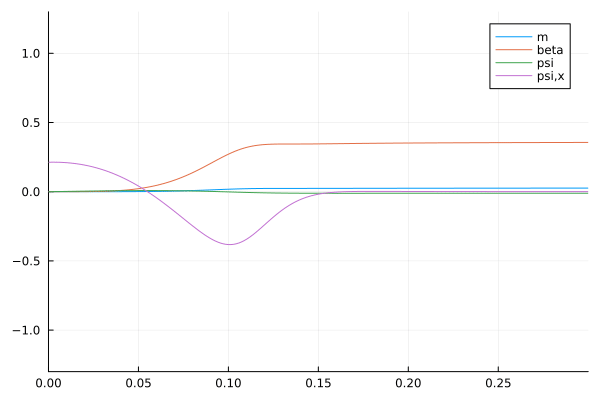

In [748]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1200:3:1751
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], ylim=[-1.3, 1.3],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/2D/anim_res1.gif")
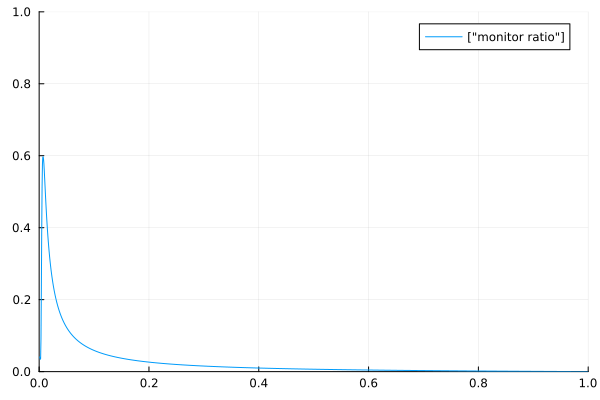

In [606]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1750:1:1750
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

muninn animation

In [68]:
using Plots, CSV, DataFrames
import GR

lines = readlines(dir*"/res$res/data.txt")
grid=[]
m=[]
beta=[]
psi=[]
derpsi=[]

anim = @animate for n in 1:10
    
    for line in lines
        
    if occursin("Time", line)==true
        grid=[]
        m=[]
        beta=[]
        psi=[]
        derpsi=[]
    else
        a=split(line, " ")
        a=deleteat!(a, findall(x->x=="",a))
        if a!=[]
            grid=vcat(grid,parse(Float64,a[1]))
            m=vcat(m,parse(Float64,a[2]))
            beta=vcat(beta,parse(Float64,a[3]))
            psi=vcat(psi,parse(Float64,a[4]))
            derpsi=vcat(derpsi,parse(Float64,a[5]))

        end
    end



    #
    
    IJulia.clear_output(true)
    

    plot()
    
    
    plot!(grid[4:L-3], [m beta psi derpsi][4:L-3,:], labels=["m" "beta" "psi" "psi,x"], ylim=[-0.001, 0.001],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1200)

LoadError: syntax: incomplete: "for" at In[68]:11 requires end

In [118]:
datagrid=Array{Float128}(undef, L)
datam=Array{Float128}(undef, L)
databeta=Array{Float128}(undef, L)
datapsi=Array{Float128}(undef, L)
dataderpsi=Array{Float128}(undef, L)

lines = readlines(dir*"/res$res/data.txt")

for line in lines
    if occursin("Time", line)==true
        plot(grid, m)
        
        
        grid=[]
        m=[]
        beta=[]
        psi=[]
        derpsi=[]
        
    else
        a=split(line, " ")
        a=deleteat!(a, findall(x->x=="",a))
        if a!=[]
            grid=vcat(grid,parse(Float64,a[1]))
            m=vcat(m,parse(Float64,a[2]))
            beta=vcat(beta,parse(Float64,a[3]))
            psi=vcat(psi,parse(Float64,a[4]))
            derpsi=vcat(derpsi,parse(Float64,a[5]))
        elseif a==[]
            #println(length(datagrid))
            #println(length(grid))
            #datagrid=cat(dims=2,datagrid, grid)
            datagrid=[datagrid; grid]
            datam=cat(dims=2,datam, m)
            databeta=cat(dims=2,databeta, beta)
            datapsi=cat(dims=2,datapsi, psi)
            dataderpsi=cat(dims=2,dataderpsi, derpsi)
        end
    end
    
end


In [119]:
datagrid

5796-element Vector{Any}:
    8.34319962899321883561303658422435691e-4956
    2.05206491026800433201677921073574507e-4936
 -nan
    8.34319963676342897893866671733368366e-4956
    1.53904868514964416335782103718351843e-4936
    2.77150719072578205953599890496588243e-4938
    1.19445898260724901253333516414690294e-4946
    1.53904868634410314596507031525083490e-4936
    2.77150776406609371101565222808974947e-4938
 -nan
    1.53904868753856212857231959331815136e-4936
    2.77150833740640536249530555121361651e-4938
    8.34319965554143682530893953901455664e-4956
    ⋮
    0.96
    0.965
    0.97
    0.975
    0.98
    0.985
    0.99
    0.995
    1.0
    1.005
    1.01
    1.015

In [117]:
A = Matrix{Int}(undef, 0, 2)  # 0x2 array of Int
B = rand(5, 2)
A = [A; B] 

5×2 Matrix{Float64}:
 0.12618    0.261235
 0.238235   0.840988
 0.200322   0.354143
 0.347195   0.854355
 0.0130686  0.727983

In [21]:
parse(Float64,"1")

1.0

In [47]:
dir*"/res$res/data.txt"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/data.txt"

In [ ]:
with open(dir) as f:
    for line in f:

        index = line.find("Time")
        if index==1:
            time.append(line[index+7:len(line)-1])
            auxgrid=[]
            auxm=[]
            auxbeta=[]
            auxpsi=[]
            auxderpsi=[]

        else:
                a=line.split()
                if a!=[]:
                    auxgrid.append(float(a[0]))
                    auxm.append(float(a[1]))
                    auxbeta.append(float(a[2]))
                    auxpsi.append(float(a[3]))
                    auxderpsi.append(float(a[4]))
                elif a==[]:
                    grid.append(auxgrid)
                    m.append(auxm)
                    beta.append(auxbeta)
                    psi.append(auxpsi)
                    derpsi.append(auxderpsi)
        datatime.append(time)
        datagrid.append(grid)
        datam.append(m)
        databeta.append(beta)
        datapsi.append(psi)
        dataderpsi.append(derpsi)

In [59]:
a=[ "ola tudo bem"]
split(a," ")

LoadError: MethodError: no method matching split(::Vector{String}, ::String)
[0mClosest candidates are:
[0m  split([91m::T[39m, ::Any; limit, keepempty) where T<:AbstractString at strings/util.jl:592

In [62]:
using DelimitedFiles

readdlm(dir*"/res$res/data.txt", ',',Int)

LoadError: unexpected character 'T' after quoted field at row 1 column 1

In [360]:
epsilon(dt,dx)

7.81250000000000000000000000000000000e-03

In [361]:
twod_epsilon(dt,dx)

3.12500000000000000000000000000000000e-02

In [363]:
epsilon(dt,dx)

7.81250000000000000000000000000000000e-03

In [147]:
twod_epsilon(dt,dx)

0.3125